<a href="https://colab.research.google.com/github/Omar-Ayman-Mohamed/Machine-learning-3rd-year/blob/main/Movie_recomender_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import pandas as pd

In [2]:
movies_df = pd.read_csv('/content/movies.csv')
ratings_df = pd.read_csv('/content/ratings.csv')
#getting first 200 user ratings
ratings_df_200user = ratings_df[0:29268]
#movies_df_200movie = movies_df[0:200]
ratings_df_200user 


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
29263,200,60074,3.5,1229887390
29264,200,61024,4.0,1229889835
29265,200,61323,4.0,1229887427
29266,200,62299,3.5,1229876803


In [3]:

#removing uncessary data (time stamp)
ratings_df_200user = ratings_df_200user.drop(['timestamp'],axis = 1)
ratings_df_200user


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
29263,200,60074,3.5
29264,200,61024,4.0
29265,200,61323,4.0
29266,200,62299,3.5


In [4]:
from sklearn.metrics.pairwise import cosine_similarity
#using pivot to build our matrix that we will pass to cosine similarity function
users_items_pivot_matrix_df = ratings_df_200user.pivot(index='movieId', 
                                                          columns='userId', 
                                                          values='rating').fillna(0)
#using data of only 200 films note(the films aren't indexed i.e index 5 doesn't mean movie id 5 )
matrix = users_items_pivot_matrix_df.iloc[0:200]
#getting cos matrix
cosmatrix = cosine_similarity(matrix)
#putting them in data frame for better visualization
cosmatrix_df = pd.DataFrame(cosmatrix)
#getting most 10 similar movies to movie 1
recomended_movies1_index_df = cosmatrix_df.nlargest(11, 0)
#getting most 10 similar movies to movie 4
recomended_movies4_index_df = cosmatrix_df.nlargest(11, 3)
#displaying matrix for 200 user and selected movies
matrix



userId,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#displaying cosine similarity matrix
cosmatrix_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,0.364634,0.284825,0.000000,0.279775,0.327928,0.270701,0.128765,0.195017,0.352899,...,0.078029,0.207645,0.338312,0.000000,0.054509,0.193446,0.029922,0.144217,0.121886,0.533147
1,0.364634,1.000000,0.278446,0.102937,0.277072,0.278936,0.240488,0.130496,0.000000,0.342590,...,0.257005,0.218991,0.368741,0.205874,0.000000,0.150889,0.171278,0.391489,0.000000,0.374672
2,0.284825,0.278446,1.000000,0.150278,0.391915,0.341700,0.592157,0.406427,0.288534,0.231410,...,0.346341,0.317709,0.389201,0.300557,0.000000,0.278921,0.242671,0.243856,0.240445,0.211501
3,0.000000,0.102937,0.150278,1.000000,0.239259,0.176604,0.297614,0.253546,0.000000,0.129040,...,0.384111,0.132964,0.066749,0.500000,0.000000,0.126547,0.272772,0.253546,0.000000,0.051085
4,0.279775,0.277072,0.391915,0.239259,1.000000,0.256166,0.539392,0.404422,0.000000,0.275293,...,0.229755,0.234621,0.226247,0.299074,0.107000,0.262406,0.241474,0.151658,0.239259,0.157366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.193446,0.150889,0.278921,0.126547,0.262406,0.134093,0.281211,0.484849,0.000000,0.300284,...,0.194433,0.496376,0.374480,0.253095,0.301833,1.000000,0.322174,0.171123,0.539935,0.100203
196,0.029922,0.171278,0.242671,0.272772,0.241474,0.226412,0.266273,0.276642,0.000000,0.272201,...,0.419099,0.413467,0.242764,0.545545,0.000000,0.322174,1.000000,0.276642,0.327327,0.075247
197,0.144217,0.391489,0.243856,0.253546,0.151658,0.104481,0.181101,0.257143,0.000000,0.232658,...,0.389559,0.235989,0.157957,0.507093,0.000000,0.171123,0.276642,1.000000,0.000000,0.159747
198,0.121886,0.000000,0.240445,0.000000,0.239259,0.000000,0.238091,0.676123,0.000000,0.240874,...,0.000000,0.199447,0.249197,0.000000,0.000000,0.539935,0.327327,0.000000,1.000000,0.000000


In [ ]:
#displaying indcies of most simliar  10 movies to movie 1
recomended_movies1_index_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,0.364634,0.284825,0.000000,0.279775,0.327928,0.270701,0.128765,0.195017,0.352899,...,0.078029,0.207645,0.338312,0.000000,0.054509,0.193446,0.029922,0.144217,0.121886,0.533147
199,0.533147,0.374672,0.211501,0.051085,0.157366,0.421490,0.240978,0.000000,0.000000,0.308726,...,0.073584,0.158350,0.236703,0.000000,0.028557,0.100203,0.075247,0.159747,0.000000,1.000000
86,0.509997,0.391715,0.249988,0.135907,0.331673,0.422130,0.252394,0.137835,0.081544,0.446618,...,0.174011,0.326177,0.514968,0.135907,0.182338,0.234475,0.180909,0.179185,0.065235,0.442257
105,0.493369,0.346687,0.287951,0.250570,0.355299,0.349783,0.335578,0.184364,0.070749,0.459642,...,0.156636,0.397353,0.479131,0.117915,0.052733,0.269837,0.241230,0.184364,0.206351,0.357281
42,0.459939,0.228449,0.200108,0.128037,0.173593,0.486783,0.226940,0.014428,0.000000,0.275976,...,0.103825,0.287995,0.409592,0.028453,0.050898,0.141624,0.090029,0.033666,0.000000,0.515268
82,0.452382,0.384000,0.443180,0.100823,0.383702,0.373363,0.279057,0.102253,0.322632,0.239603,...,0.203317,0.285712,0.352194,0.201645,0.000000,0.143537,0.225513,0.153379,0.000000,0.382749
119,0.438606,0.317226,0.310064,0.112747,0.325957,0.360483,0.366868,0.215987,0.090198,0.530628,...,0.158793,0.384778,0.490010,0.112747,0.168073,0.343220,0.287040,0.133404,0.263076,0.324222
40,0.429123,0.344040,0.351099,0.129796,0.231186,0.443486,0.261819,0.156014,0.069224,0.411896,...,0.171726,0.259353,0.535869,0.115374,0.193488,0.261588,0.176237,0.126761,0.092299,0.498402
31,0.423360,0.460070,0.300879,0.161790,0.369557,0.271887,0.332241,0.280311,0.121342,0.356219,...,0.124290,0.260836,0.376176,0.161790,0.072355,0.275547,0.229485,0.335006,0.161790,0.290568
153,0.419537,0.387356,0.321855,0.081954,0.380726,0.255093,0.308134,0.267819,0.098345,0.402449,...,0.213360,0.255170,0.508742,0.163908,0.244339,0.244295,0.160954,0.138527,0.174835,0.176885


In [ ]:
#displaying indcies of most simliar  10 movies to movie 4
recomended_movies4_index_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
3,0.000000,0.102937,0.150278,1.000000,0.239259,0.176604,0.297614,0.253546,0.000000,0.129040,...,0.384111,0.132964,0.066749,0.500000,0.0000,0.126547,0.272772,0.253546,0.0,0.051085
89,0.062710,0.105921,0.278343,0.600245,0.276970,0.212012,0.336866,0.260897,0.308697,0.154911,...,0.395247,0.136819,0.160263,0.514496,0.0000,0.130216,0.280680,0.260897,0.0,0.070088
134,0.063653,0.143352,0.156961,0.522233,0.426910,0.199829,0.217593,0.264820,0.000000,0.247092,...,0.401190,0.196742,0.123942,0.522233,0.3114,0.190919,0.284901,0.294245,0.0,0.097821
26,0.000000,0.205874,0.300557,0.500000,0.299074,0.176604,0.238091,0.507093,0.000000,0.129040,...,0.768221,0.265929,0.133498,1.000000,0.0000,0.253095,0.545545,0.507093,0.0,0.000000
46,0.000000,0.000000,0.000000,0.500000,0.179445,0.176604,0.178568,0.000000,0.000000,0.129040,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.102170
132,0.000000,0.205874,0.300557,0.500000,0.299074,0.176604,0.238091,0.507093,0.000000,0.129040,...,0.768221,0.265929,0.133498,1.000000,0.0000,0.253095,0.545545,0.507093,0.0,0.000000
139,0.000000,0.205874,0.300557,0.500000,0.299074,0.176604,0.238091,0.507093,0.000000,0.129040,...,0.768221,0.265929,0.133498,1.000000,0.0000,0.253095,0.545545,0.507093,0.0,0.000000
148,0.000000,0.205874,0.300557,0.500000,0.299074,0.176604,0.238091,0.507093,0.000000,0.129040,...,0.768221,0.265929,0.133498,1.000000,0.0000,0.253095,0.545545,0.507093,0.0,0.000000
154,0.000000,0.205874,0.300557,0.500000,0.299074,0.176604,0.238091,0.507093,0.000000,0.129040,...,0.768221,0.265929,0.133498,1.000000,0.0000,0.253095,0.545545,0.507093,0.0,0.000000
157,0.000000,0.205874,0.300557,0.500000,0.299074,0.176604,0.238091,0.507093,0.000000,0.129040,...,0.768221,0.265929,0.133498,1.000000,0.0000,0.253095,0.545545,0.507093,0.0,0.000000


by using these indcies we get movie ids to recommend for movie 1 :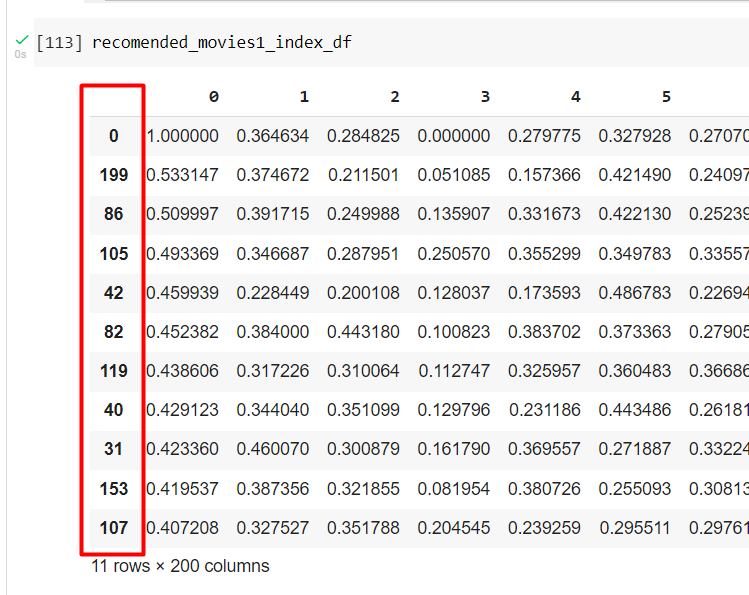
and for movie 4: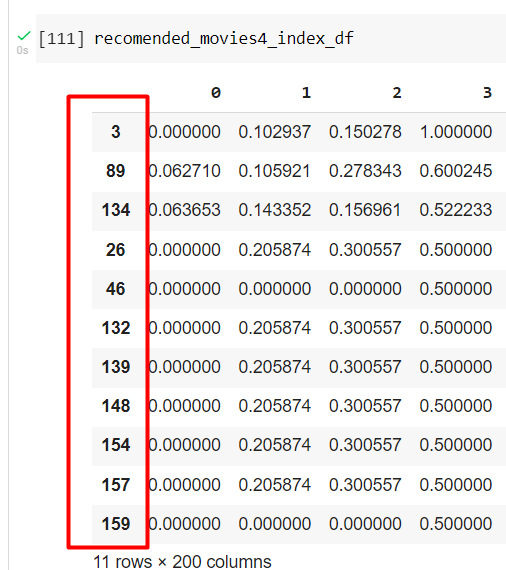

In [ ]:
movie1_indices = [0,199,86,105,42,82,119,40,31,153,107]
mz = matrix.iloc[movie1_indices]
mz

userId,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
260,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,4.0,0.0,0.0,5.0,4.0,5.0
110,4.0,0.0,0.0,0.0,4.0,5.0,0.0,3.0,0.0,0.0,...,3.0,3.0,0.0,0.0,0.0,3.5,0.0,3.0,0.0,4.5
150,0.0,0.0,0.0,0.0,3.0,4.0,4.5,4.0,0.0,0.0,...,2.0,5.0,0.0,0.0,4.0,5.0,0.0,0.0,4.0,4.0
50,5.0,0.0,0.0,0.0,4.0,1.0,4.5,5.0,0.0,0.0,...,5.0,0.0,0.0,0.0,5.0,0.0,3.0,5.0,4.0,0.0
104,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.5,0.0,3.0,0.0,4.5
165,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0
47,5.0,0.0,0.0,2.0,0.0,4.0,0.0,4.0,0.0,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,4.0
34,0.0,0.0,0.0,0.0,4.0,4.0,0.0,5.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.5


In [ ]:
movies4_indcies = [3,89,134,26,46,132,139,148,154,157,159]
bz = matrix.iloc[movies4_indcies]
bz

userId,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
movieId,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The movies that are similar to movies 1 has the following movie ids: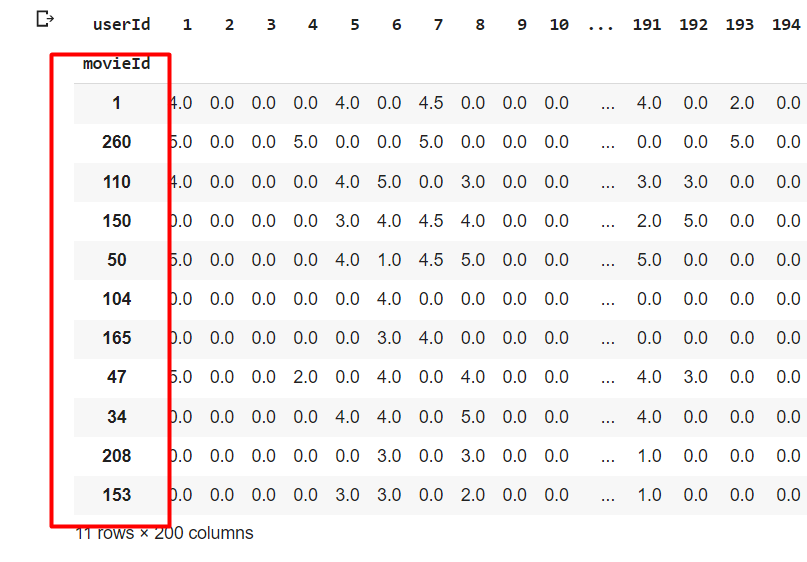
and for movie 4:
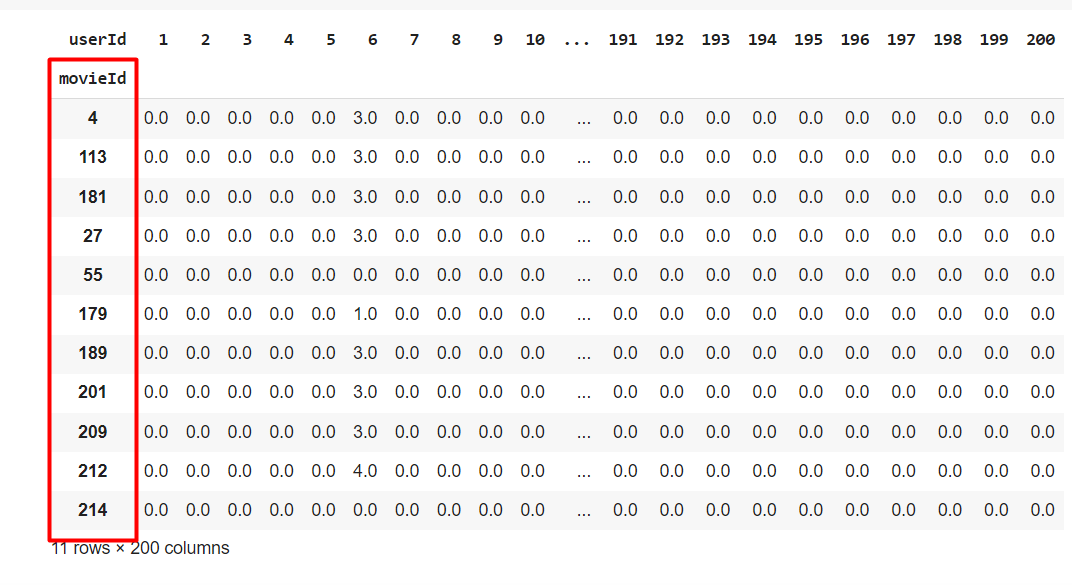


In [ ]:
movie1_ids = [1,260,110,150,50,104,165,47,34,208,153]
for i in range(0,11):
  print(movies_df[movies_df['movieId']==movie1_ids[i]])

   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
     movieId                                      title  \
224      260  Star Wars: Episode IV - A New Hope (1977)   

                      genres  
224  Action|Adventure|Sci-Fi  
    movieId              title            genres
97      110  Braveheart (1995)  Action|Drama|War
     movieId             title                genres
123      150  Apollo 13 (1995)  Adventure|Drama|IMAX
    movieId                       title                  genres
46       50  Usual Suspects, The (1995)  Crime|Mystery|Thriller
    movieId                 title  genres
92      104  Happy Gilmore (1996)  Comedy
     movieId                              title                 genres
138      165  Die Hard: With a Vengeance (1995)  Action|Crime|Thriller
    movieId                        title            genres
43       47  Seven (a.k.a. Se7en) (1995)  Mystery|Thri

In [ ]:
movie4_ids = [4,113,181,27,55,179,189,201,209,212,214]
for i in range(0,11):
  print(movies_df[movies_df['movieId']==movie4_ids[i]])

   movieId                     title                genres
3        4  Waiting to Exhale (1995)  Comedy|Drama|Romance
     movieId                    title         genres
100      113  Before and After (1996)  Drama|Mystery
     movieId                                           title           genres
153      181  Mighty Morphin Power Rangers: The Movie (1995)  Action|Children
    movieId                title          genres
26       27  Now and Then (1995)  Children|Drama
    movieId           title genres
50       55  Georgia (1995)  Drama
     movieId            title         genres
151      179  Mad Love (1995)  Drama|Romance
     movieId            title          genres
160      189  Reckless (1995)  Comedy|Fantasy
     movieId                title         genres
169      201  Three Wishes (1995)  Drama|Fantasy
     movieId                      title genres
177      209  White Man's Burden (1995)  Drama
     movieId               title                          genres
180      212 

In [ ]:
from sklearn.neighbors import NearestNeighbors
#knn = NearestNeighbors(metric='cosine', algorithm='brute')
#knn.fit(matrix.values)
#distances, indices = knn.kneighbors(matrix.values, n_neighbors=11)
movie1_indices = [0,199,86,105,42,82,119,40,31,153,107]


q = [1,260,110,150,50,104,165,47,34,208,153]
p = [4,113,181,240,179,212,209,214,250,254,27]



movies4_indcies = [3,89,134,26,46,132,139,148,154,157,159]
corsponr = [4,113,181,27,55,179,189,201,209,212,214]

#for i in range(0,11):
 # print(movies_df[movies_df['movieId']==corsponr[i]])
#print(movies_df_200movie['title'][indices[3]])
#print(movies_df[movies_df['movieId']==])

